# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
from scipy.stats import linregress
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_study_complete = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_study_complete

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count = len(mouse_study_complete['Mouse ID'].unique())

mice_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint

mouse_study_complete_df = mouse_study_complete.set_index(["Mouse ID","Timepoint"])
mouse_study_complete_df.head()


Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     0             Ramicane  Male          21          16   
         5             Ramicane  Male          21          16   
         10            Ramicane  Male          21          16   
         15            Ramicane  Male          21          16   
         20            Ramicane  Male          21          16   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     0                   45.000000                 0  
         5                   38.825898                 0  
         10                  35.014271                 1  
         15                  34.223992                 1  
         20                  32.997729                 1

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
mouse_study_complete_df = mouse_study_complete.set_index(["Mouse ID","Timepoint"])

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_mice = mouse_study_complete_df.groupby(['Mouse ID', 'Timepoint']).size().reset_index(name='count')

# Filter the groups where the count is greater than 1
duplicate_mice = duplicate_mice[duplicate_mice['count'] > 1]

#duplicate_id = duplicate_mice["Mouse ID"].unique()

duplicate_mice



,Mouse ID,Timepoint,count
586,g989,0,2
587,g989,5,2
588,g989,10,2
589,g989,15,2
590,g989,20,2


In [5]:
# Optional: Get all the data for the duplicate mouse ID. 

only_g989 = mouse_study_complete.loc[mouse_study_complete['Mouse ID'] == "g989"]
only_g989


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.


mouse_study_no_dups = mouse_study_complete[mouse_study_complete['Mouse ID'] != "g989"]
mouse_study_no_dups


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
# Checking the number of mice in the clean DataFrame.
num_unique_mice = mouse_study_no_dups['Mouse ID'].nunique()
num_unique_mice


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Group the data by the 'regimen' column
grouped_regimen_summary = mouse_study_no_dups.groupby('Drug Regimen')

# Calculate the statistics for each group
tumor_mean = grouped_regimen_summary['Tumor Volume (mm3)'].mean()
tumor_median = grouped_regimen_summary['Tumor Volume (mm3)'].median()
tumor_var = grouped_regimen_summary['Tumor Volume (mm3)'].var()
tumor_std = grouped_regimen_summary['Tumor Volume (mm3)'].std()
tumor_sem = grouped_regimen_summary['Tumor Volume (mm3)'].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_regimen_df = pd.DataFrame({'Mean':tumor_mean, 'Median':tumor_median, 'Variance':tumor_var, 'Standard Deviation':tumor_std, 'SEM':tumor_sem})

print(summary_regimen_df)



                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

summary_stats_single_line = mouse_study_no_dups.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(['mean', 'median', 'var', 'std', 'sem']).rename(columns={'mean': 'Mean', 'median': 'Median', 'var': 'Variance', 'std': 'Standard Deviation', 'sem': 'SEM'})

print(summary_stats_single_line)

                   Mean     Median   Variance  Standard Deviation       SEM
Drug Regimen                                                               
Capomulin     40.675741  41.557809  24.947764            4.994774  0.329346
Ceftamin      52.591172  51.776157  39.290177            6.268188  0.469821
Infubinol     52.884795  51.820584  43.128684            6.567243  0.492236
Ketapril      55.235638  53.698743  68.553577            8.279709  0.603860
Naftisol      54.331565  52.509285  66.173479            8.134708  0.596466
Placebo       54.033581  52.288934  61.168083            7.821003  0.581331
Propriva      52.320930  50.446266  43.852013            6.622085  0.544332
Ramicane      40.216745  40.673236  23.486704            4.846308  0.320955
Stelasyn      54.233149  52.431737  59.450562            7.710419  0.573111
Zoniferol     53.236507  51.818479  48.533355            6.966589  0.516398


## Bar and Pie Charts

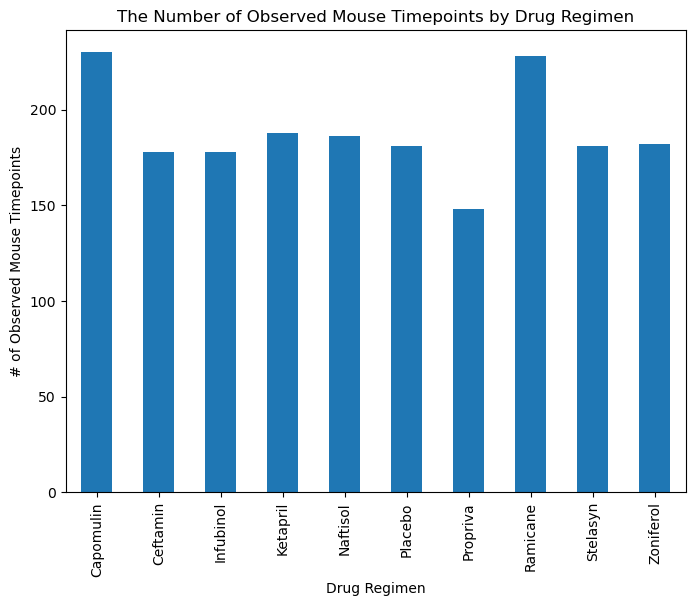

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
total_rows = mouse_study_no_dups.groupby('Drug Regimen').size()

total_rows.plot(kind='bar', figsize=(8, 6))
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('The Number of Observed Mouse Timepoints by Drug Regimen')
plt.show()

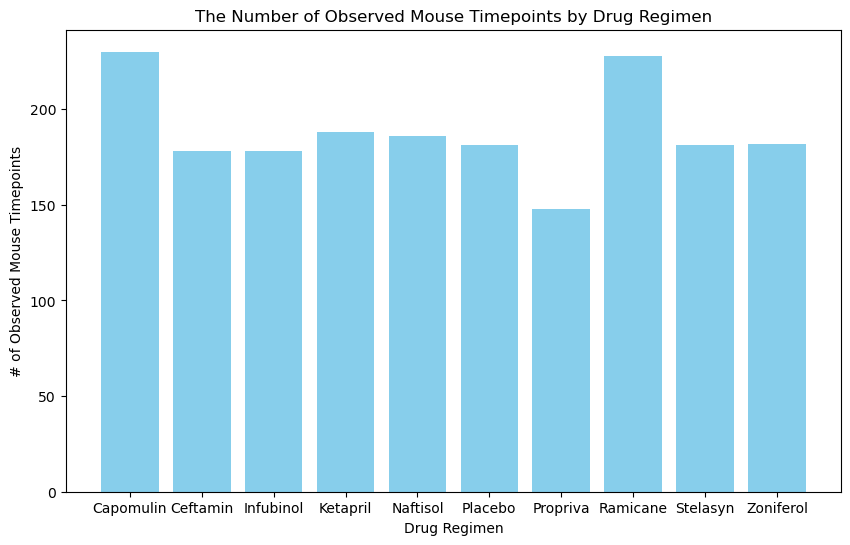

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot

total_rows = mouse_study_no_dups.groupby('Drug Regimen').size().reset_index(name='GroupSize')

regimen_bar_data = pd.DataFrame(total_rows)

# Extract data for plotting
categories = regimen_bar_data['Drug Regimen']
values = regimen_bar_data['GroupSize']

# Create the bar plot
plt.figure(figsize=(10, 6))
plt.bar(categories, values, color='skyblue')

# Add labels and title
plt.xlabel('Drug Regimen')
plt.ylabel('# of Observed Mouse Timepoints')
plt.title('The Number of Observed Mouse Timepoints by Drug Regimen')

# Show the plot
plt.show()

<Axes: title={'center': 'Distribution of Female vs. Male Mice'}, ylabel='count'>

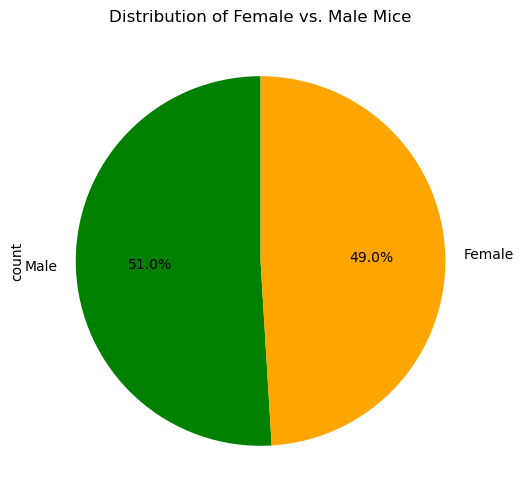

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

# Count the number of female and male mice
gender_counts = mouse_study_no_dups['Sex'].value_counts()

gender_counts

gender_counts.plot(kind='pie', figsize=(6, 6), autopct='%1.1f%%', startangle=90, colors=['green', 'orange'], title='Distribution of Female vs. Male Mice')



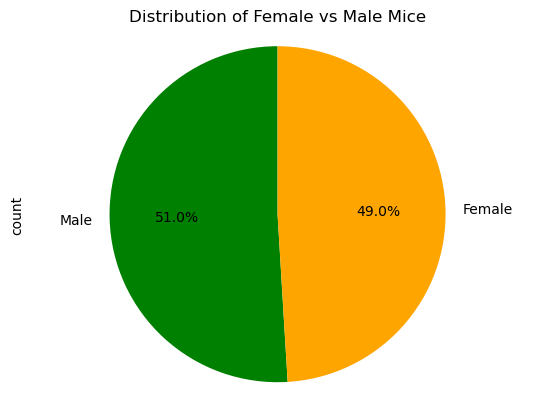

In [13]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
# Count the number of female and male mice
gender_counts = mouse_study_no_dups['Sex'].value_counts()

# Plot a pie chart 
gender_counts.plot.pie(autopct='%1.1f%%', startangle=90, colors=['green', 'orange'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Distribution of Female vs Male Mice')
plt.show()

## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

final_tumor_volumes = mouse_study_complete[mouse_study_complete['Drug Regimen'].isin(treatment_regimens)]

# Start by getting the last (greatest) timepoint for each mouse
max_timepoints = final_tumor_volumes.groupby('Mouse ID')['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
final_tumor_volumes = pd.merge(final_tumor_volumes, max_timepoints, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the final tumor volume of each mouse across the four treatment regimens
final_tumor_volumes.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,45,22.050126,1
1,s185,Capomulin,Female,3,17,45,23.343598,1
2,x401,Capomulin,Female,16,15,45,28.484033,0
3,m601,Capomulin,Male,22,17,45,28.430964,1
4,g791,Ramicane,Male,11,16,45,29.128472,1


In [29]:
# Put treatments into a list for for loop (and later for plot labels)
drugs_of_interest = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

tumor_volumes = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for drug in drugs_of_interest:
    # Filter the DataFrame by drug name
    drug_subset = mouse_study_complete_df[mouse_study_complete_df['Drug Regimen'] == drug]

    # Retrieve tumor volumes for the mice on this drug
    tumor_volumes = drug_subset['Tumor Volume (mm3)']

    # Calculate the quartiles
    quartiles = drug_subset['Tumor Volume (mm3)'].quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    
    # Calculate the IQR
    IQR = Q3 - Q1

    
    # Calculate lower and upper bounds for potential outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Check for potential outliers
    outliers = drug_subset[(drug_subset["Tumor Volume (mm3)"] < lower_bound) | (drug_subset["Tumor Volume (mm3)"] > upper_bound)]

    # Print potential outliers
    print(f"Potential outliers in Tumor Volume for {drug}")
    print(outliers)

Potential outliers in Tumor Volume for Capomulin
                   Drug Regimen     Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                                
s185     40           Capomulin  Female           3          17   
         45           Capomulin  Female           3          17   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
s185     40                  25.472143                 1  
         45                  23.343598                 1  
Potential outliers in Tumor Volume for Ramicane
                   Drug Regimen   Sex  Age_months  Weight (g)  \
Mouse ID Timepoint                                              
k403     45            Ramicane  Male          21          16   

                    Tumor Volume (mm3)  Metastatic Sites  
Mouse ID Timepoint                                        
k403     45                  22.050126                 1  
Potential outliers in Tum

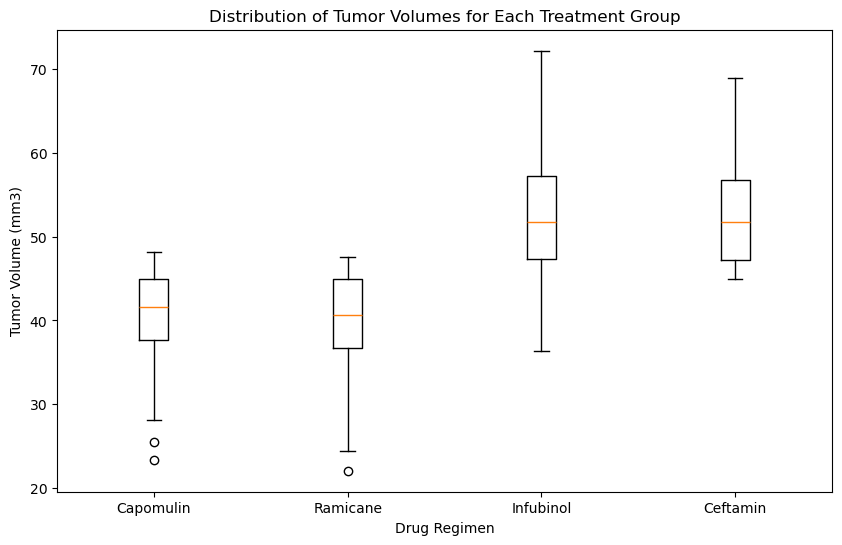

In [24]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Define the treatment list
treatment_list = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']

# Create a list to store the tumor volume data for each treatment group
tumor_data = []

# Generate a box plot for each treatment group
plt.figure(figsize=(10, 6))

for treatment in treatment_list:
    tumor_volume = mouse_study_complete.loc[mouse_study_complete["Drug Regimen"] == treatment, 'Tumor Volume (mm3)']
    tumor_data.append(tumor_volume)
    plt.boxplot(tumor_volume, positions=[treatment_list.index(treatment) + 1], labels=[treatment])

plt.title('Distribution of Tumor Volumes for Each Treatment Group')
plt.ylabel('Tumor Volume (mm3)')
plt.xlabel('Drug Regimen')
plt.xticks(range(1, len(treatment_list) + 1), treatment_list)
plt.show()

## Line and Scatter Plots

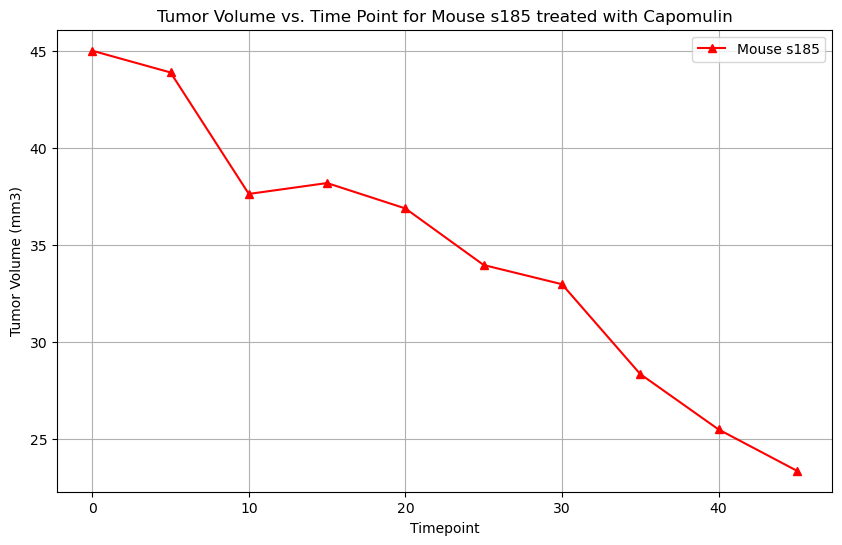

In [30]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

# Filter the data for a single mouse treated with Capomulin
mouse_id ="s185"  # Replace 'mouse_id_here' with the actual Mouse ID
capomulin_data = mouse_study_complete[(mouse_study_complete['Drug Regimen'] == 'Capomulin') & (mouse_study_complete['Mouse ID'] == mouse_id)]

# Create a line plot of tumor volume vs. time point
plt.figure(figsize=(10, 6))
plt.plot(capomulin_data['Timepoint'], capomulin_data['Tumor Volume (mm3)'], marker='^', color='r', label=f'Mouse {mouse_id}')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} treated with Capomulin')
plt.legend()
plt.grid(True)
plt.show()

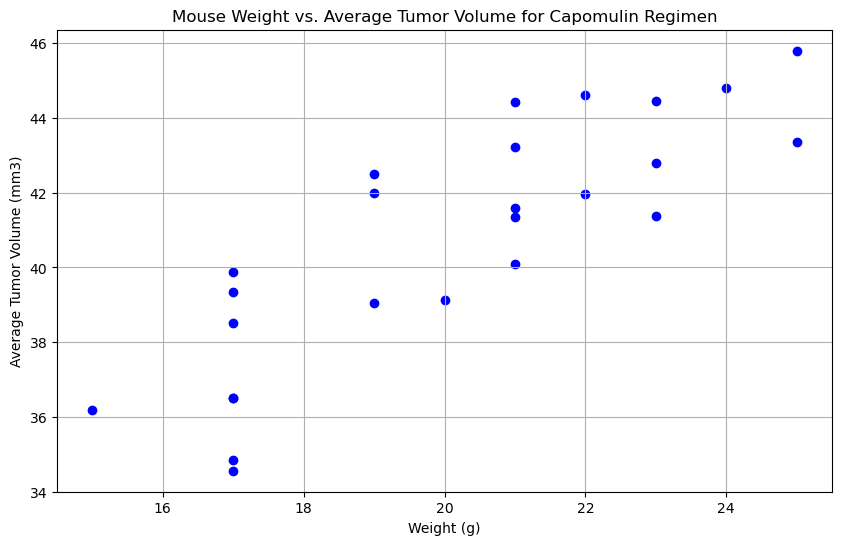

In [20]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = mouse_study_complete[mouse_study_complete['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID to calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='inner').drop_duplicates()

# Create a scatter plot of mouse weight vs. average tumor volume
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.grid(True)
plt.show()

## Correlation and Regression

Correlation Coefficient: 0.8419363424694722
Linear Regression Equation: y = 0.95x + 21.55


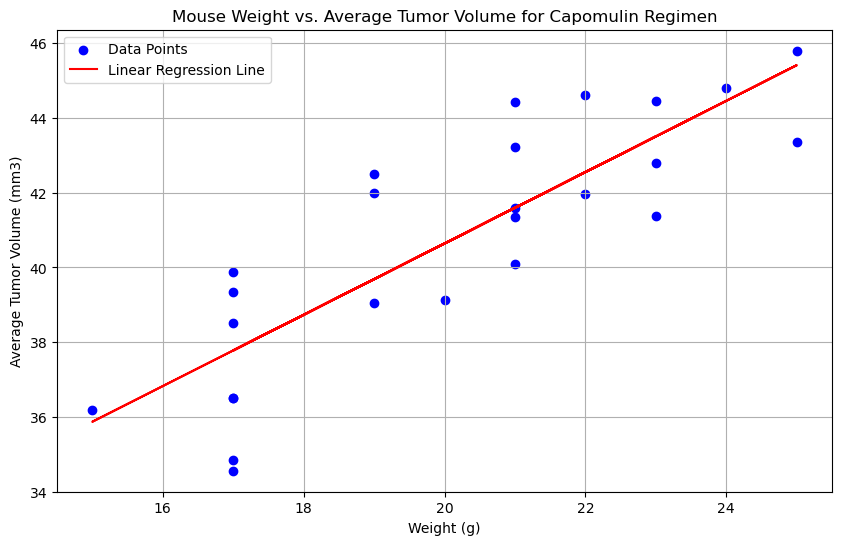

In [21]:
# Calculate the correlation coefficient and a linear regression model for mouse weight and average observed tumor volume for the entire Capomulin regimen

# Filter the data for the Capomulin regimen
capomulin_data = mouse_study_complete[mouse_study_complete['Drug Regimen'] == 'Capomulin']

# Group the data by Mouse ID to calculate the average tumor volume for each mouse
average_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()

# Merge the average tumor volume data with the mouse weight data
merged_data = pd.merge(average_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how='inner').drop_duplicates()

# Calculate the correlation coefficient between mouse weight and average observed tumor volume
correlation_coefficient = np.corrcoef(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])[0, 1]
print(f"Correlation Coefficient: {correlation_coefficient}")

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'])

# Create the linear regression equation
line_eq = f"y = {slope:.2f}x + {intercept:.2f}"
print(f"Linear Regression Equation: {line_eq}")

# Plot the linear regression model
plt.figure(figsize=(10, 6))
plt.scatter(merged_data['Weight (g)'], merged_data['Tumor Volume (mm3)'], color='b', marker='o', label='Data Points')
plt.plot(merged_data['Weight (g)'], slope * merged_data['Weight (g)'] + intercept, color='r', label='Linear Regression Line')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume for Capomulin Regimen')
plt.legend()
plt.grid(True)
plt.show()